In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dosya_yolu = 'disney_movies.csv'
df = pd.read_csv(dosya_yolu)
print(df)
print(df.info())

                         movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
0      184925485                5228953251

In [3]:
df.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [4]:
print("Veri Setinin Boyutu (Satır, Sütun):")
print(df.shape)
print("\n" + "="*50)


print("Toplam Veri Sayısı:")
print(df.size)
print("\n" + "="*50)

Veri Setinin Boyutu (Satır, Sütun):
(579, 6)

Toplam Veri Sayısı:
3474



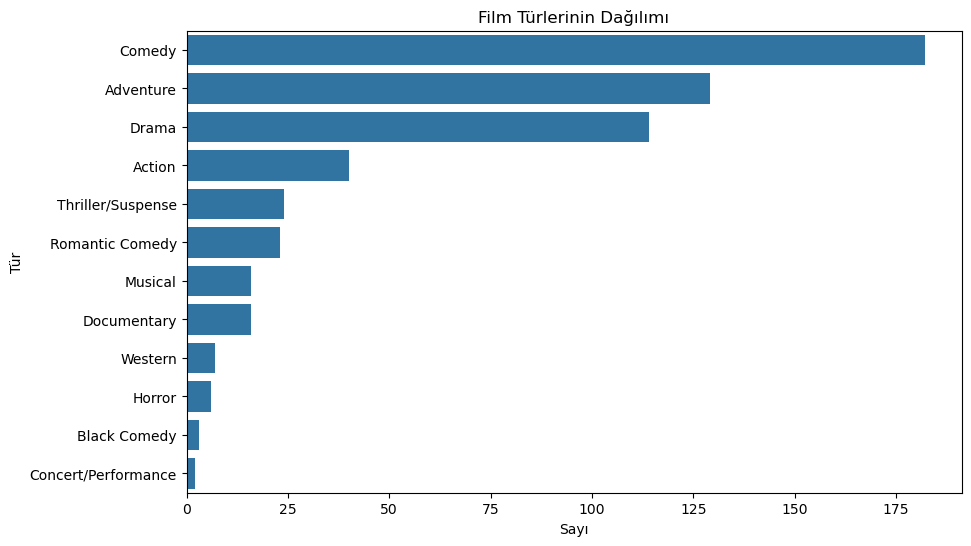

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Film Türlerinin Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Tür')
plt.show()

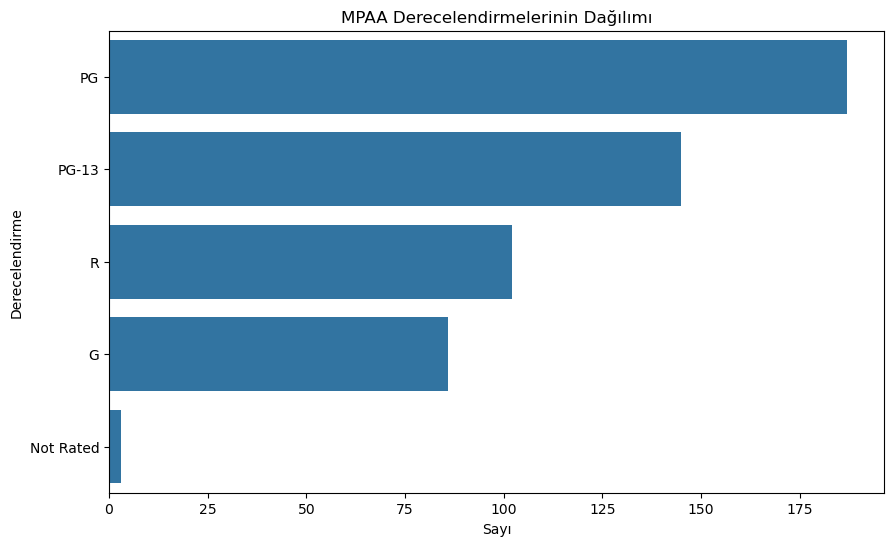

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(y='mpaa_rating', data=df, order=df['mpaa_rating'].value_counts().index)
plt.title('MPAA Derecelendirmelerinin Dağılımı')
plt.xlabel('Sayı')
plt.ylabel('Derecelendirme')
plt.show()

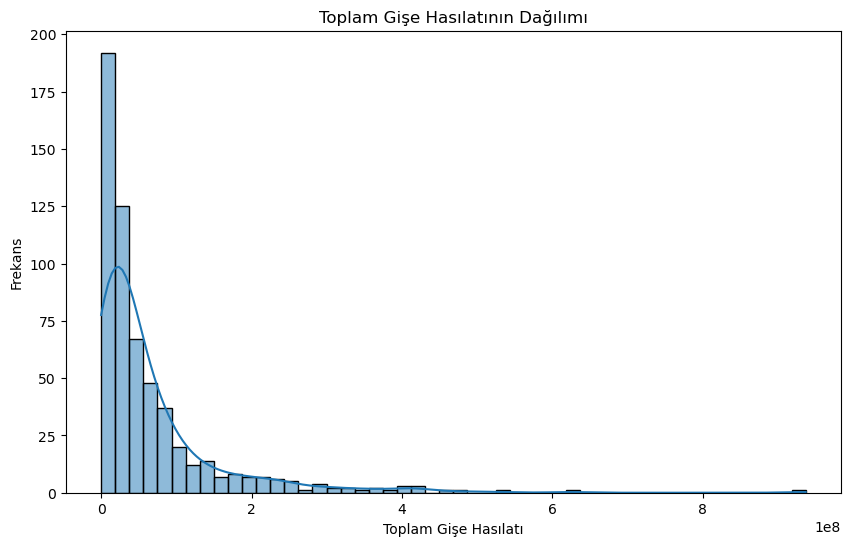

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['total_gross'], bins=50, kde=True)
plt.title('Toplam Gişe Hasılatının Dağılımı')
plt.xlabel('Toplam Gişe Hasılatı')
plt.ylabel('Frekans')
plt.show()

In [9]:
top_grossing = df.sort_values(by='inflation_adjusted_gross', ascending=False).head(10)
print(top_grossing[['movie_title', 'inflation_adjusted_gross']])

                              movie_title  inflation_adjusted_gross
0         Snow White and the Seven Dwarfs                5228953251
1                               Pinocchio                2188229052
2                                Fantasia                2187090808
8                          101 Dalmatians                1362870985
6                      Lady and the Tramp                1236035515
3                       Song of the South                1078510579
564  Star Wars Ep. VII: The Force Awakens                 936662225
4                              Cinderella                 920608730
13                        The Jungle Book                 789612346
179                         The Lion King                 761640898


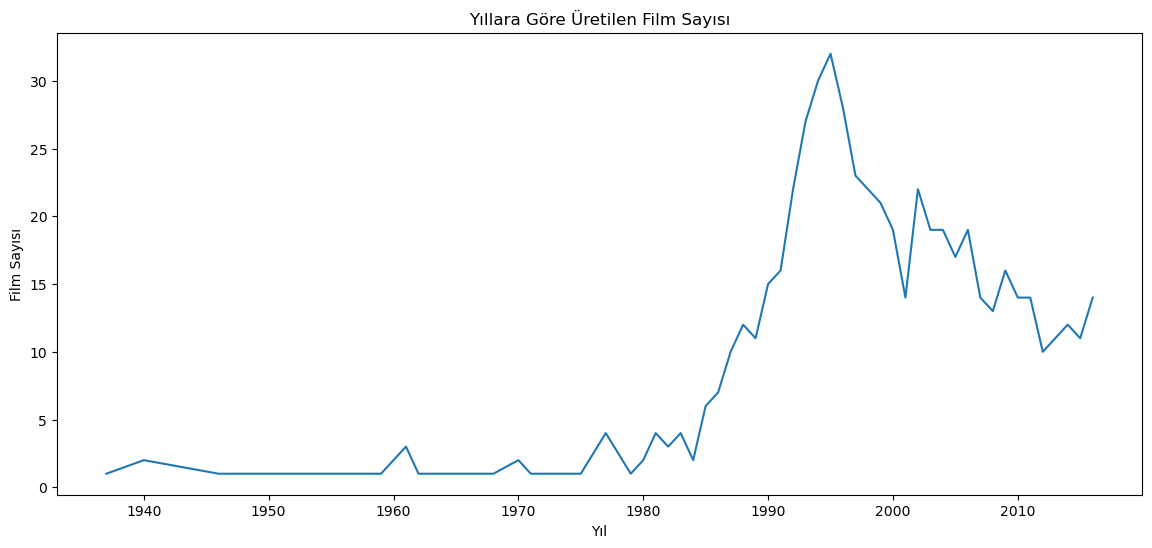

In [10]:
# 'release_date' sütununu datetime formatına dönüştürme
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# 'year' sütununu oluşturma
df['year'] = df['release_date'].dt.year

# 'total_gross' ve 'inflation_adjusted_gross' sütunlarındaki sıfır değerleri medyan ile değiştirme
df['total_gross'] = df['total_gross'].replace(0, df['total_gross'].median())
df['inflation_adjusted_gross'] = df['inflation_adjusted_gross'].replace(0, df['inflation_adjusted_gross'].median())
films_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(14,6))
sns.lineplot(x=films_per_year.index, y=films_per_year.values)
plt.title('Yıllara Göre Üretilen Film Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Film Sayısı')
plt.show()

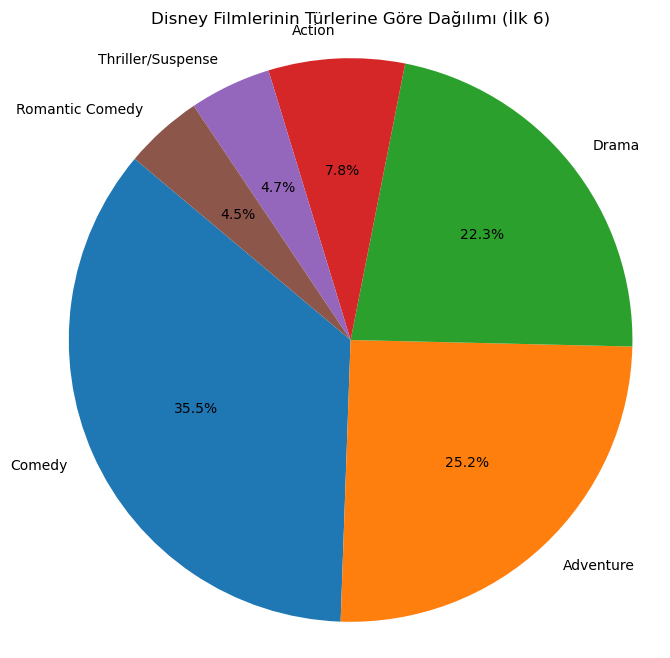

In [11]:
genre_counts = df['genre'].value_counts().head(6)  # En popüler 6 türü al

plt.figure(figsize=(8,8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Disney Filmlerinin Türlerine Göre Dağılımı (İlk 6)')
plt.axis('equal')
plt.show()